In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, LinearRegression
from matplotlib import pyplot as plt

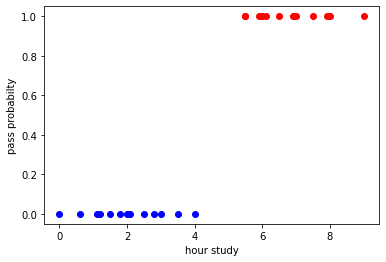

In [3]:
x1 = np.array([0, 0.6, 1.1, 1.5, 1.8, 2.5, 2, 2.1, 3, 2.8, 1.2, 4, 3.5])
y1 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

x2 = np.array([5.5, 6, 5.9, 7.5, 5.5, 6.5, 6, 6.1, 6.9, 7, 7.9, 8, 9])
y2 = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

X = np.append(x1, x2, axis = 0).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

plt.plot(x1, y1, 'bo')
plt.plot(x2, y2, 'ro')
plt.xlabel('hour study')
plt.ylabel('pass probabilty')
plt.show()

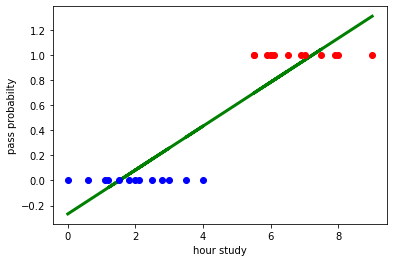

In [4]:
model = LinearRegression().fit(X, y)

y_new = model.predict(X)

plt.plot(X, y_new, "green", linewidth=3, label="Predictions")
plt.plot(x1, y1, 'bo')
plt.plot(x2, y2, 'ro')
plt.xlabel('hour study')
plt.ylabel('pass probabilty')
plt.show()

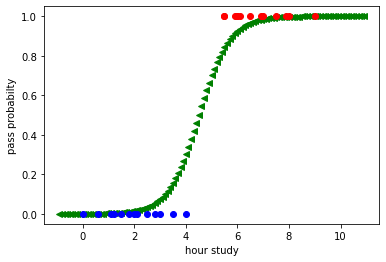

In [5]:
model = LogisticRegression().fit(X, y)

y_new = model.predict(X)

def logistic(classifier, x):
    return 1 / (1 + np.exp(-(model.intercept_ + model.coef_ * x)))


for i in range(1, 120):
    plt.plot(i / 10.0 - 1, logistic(model, (i-10) / 10.0), 'g<')
plt.plot(x1, y1, 'bo')
plt.plot(x2, y2, 'ro')
plt.xlabel('hour study')
plt.ylabel('pass probabilty')

plt.show()

In [6]:
def prediction(num, model):
    pred = model.predict_proba([[num]])
    
    if (pred[0][0] > pred[0][1]):
        rst = 0
    else:
        rst = 1
    
    return pred, rst

pred_prob, pred_value = prediction(4.5, model)
print(pred_prob, pred_value)

[[0.497288 0.502712]] 1


In [7]:
print(model.coef_)
print(model.intercept_)

[[1.68165547]]
[-7.5566015]


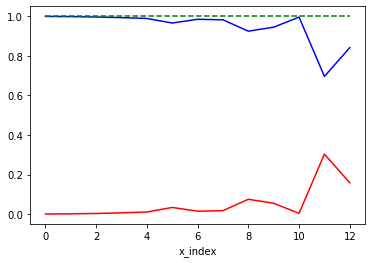

In [17]:
def make_z(x, model):
    z = (x*model.coef_[0][0] + model.intercept_)
    
    return z

def sigmoid_func(z):
    y = 1 / (1 + np.exp(-1 * z))
    return y[0]

prob = []
for x in x1:
    z = make_z(x, model)
    prob.append(sigmoid_func(z))
    
prob_in_model = []
for x in x1:
    pred_prob, _ = prediction(x, model)
    prob_in_model.append(pred_prob[0][0])

    
add = []
for i in range(len(prob)):
    add.append(prob[i] + prob_in_model[i])
    
    
plt.plot(prob, c = 'red')
plt.plot(prob_in_model, c = 'blue')
plt.plot(add, 'g--')
plt.xlabel('x_index')
plt.show()